In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Superstore.csv',encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


### Clean the Data

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

## Exploratory Data Analysis (EDA)


### Top Revenue-Generating States / Cities

####  Find top revenue-generating states:

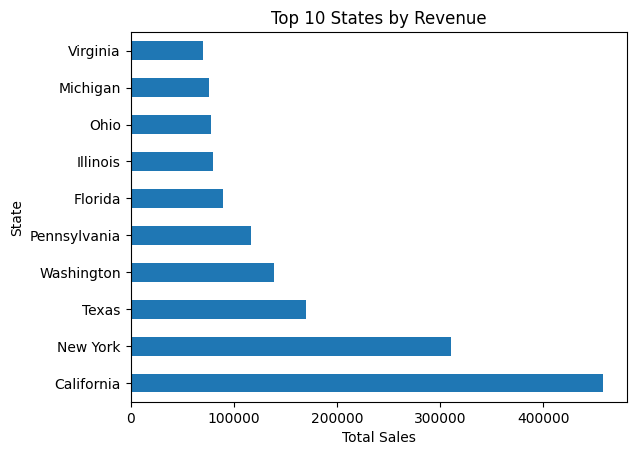

In [31]:
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
state_sales.head(10).plot(kind='barh')
plt.title("Top 10 States by Revenue")
plt.xlabel("Total Sales")

plt.savefig(" Top 10 States by Revenue.png", dpi=300, bbox_inches='tight')

####  Profit by Region:

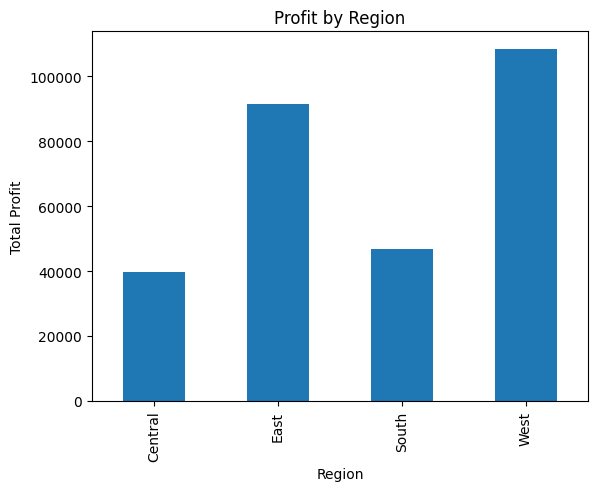

In [32]:
df.groupby("Region")["Profit"].sum().plot(kind='bar')
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.savefig("Profit by Region.png", dpi=300, bbox_inches='tight')
plt.show()


#### Profit by City

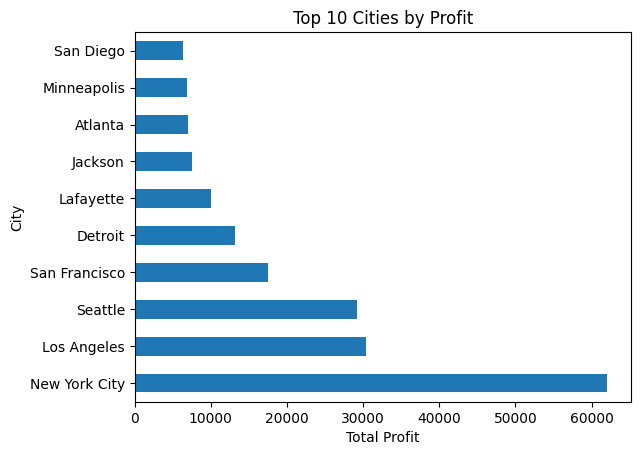

In [33]:
top_cities = df.groupby("City")["Profit"].sum().sort_values(ascending=False)
top_cities.head(10).plot(kind="barh", title="Top 10 Cities by Profit")
plt.xlabel("Total Profit")
plt.savefig("Top 10 Cities by Profit.png", dpi=300, bbox_inches='tight')
plt.show()

## Analyze Shipping Delays

#### Average delay by Ship Mode:


Ship Mode
Same Day          0.044199
First Class       2.182705
Second Class      3.238046
Standard Class    5.006535
Name: Shipping Delay, dtype: float64


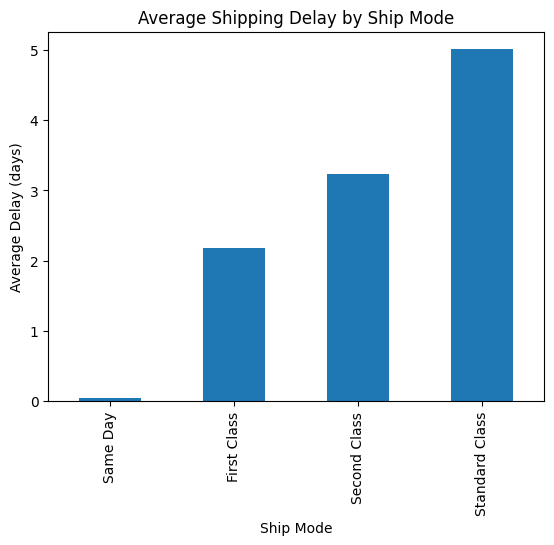

In [34]:
df["Shipping Delay"] = (df["Ship Date"] - df["Order Date"]).dt.days
print(df.groupby("Ship Mode")["Shipping Delay"].mean().sort_values())
df.groupby("Ship Mode")["Shipping Delay"].mean().sort_values().plot(kind='bar')
plt.title("Average Shipping Delay by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Average Delay (days)")
plt.savefig("Average Shipping Delay by Ship Mode.png", dpi=300, bbox_inches='tight')
plt.show()



####  Delay vs. Profit or Sales:

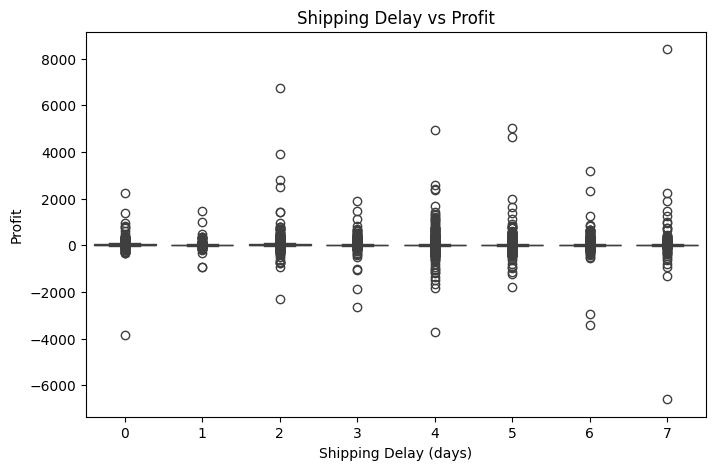

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Shipping Delay", y="Profit")
plt.xlabel("Shipping Delay (days)")
plt.ylabel("Profit")
plt.title("Shipping Delay vs Profit")
plt.savefig("Shipping Delay vs Profit.png", dpi=300, bbox_inches='tight')
plt.show()


## Segment Performance

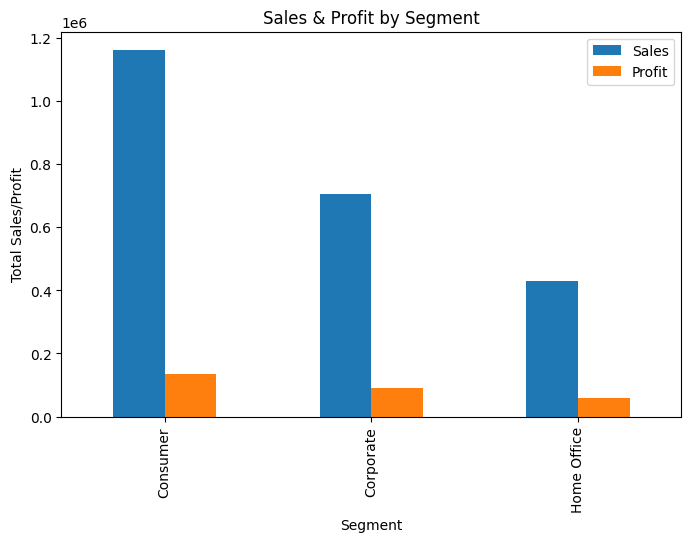

In [36]:
df.groupby("Segment")[["Sales", "Profit"]].sum().plot(kind="bar", figsize=(8,5), title="Sales & Profit by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales/Profit")

plt.savefig("Sales & Profit by Segment.png", dpi=300, bbox_inches='tight')
plt.show()

## Identify Loss-Making Categories

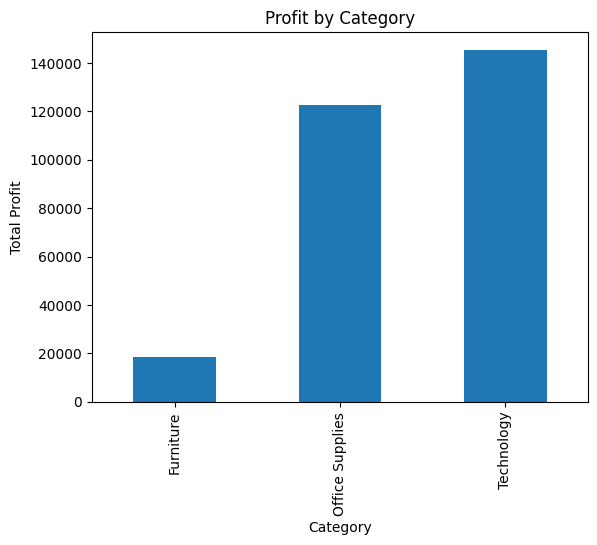

In [37]:
df.groupby("Category")["Profit"].sum().sort_values().plot(kind="bar", title="Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.savefig("Profit by Category.png", dpi=300, bbox_inches='tight')
plt.show()


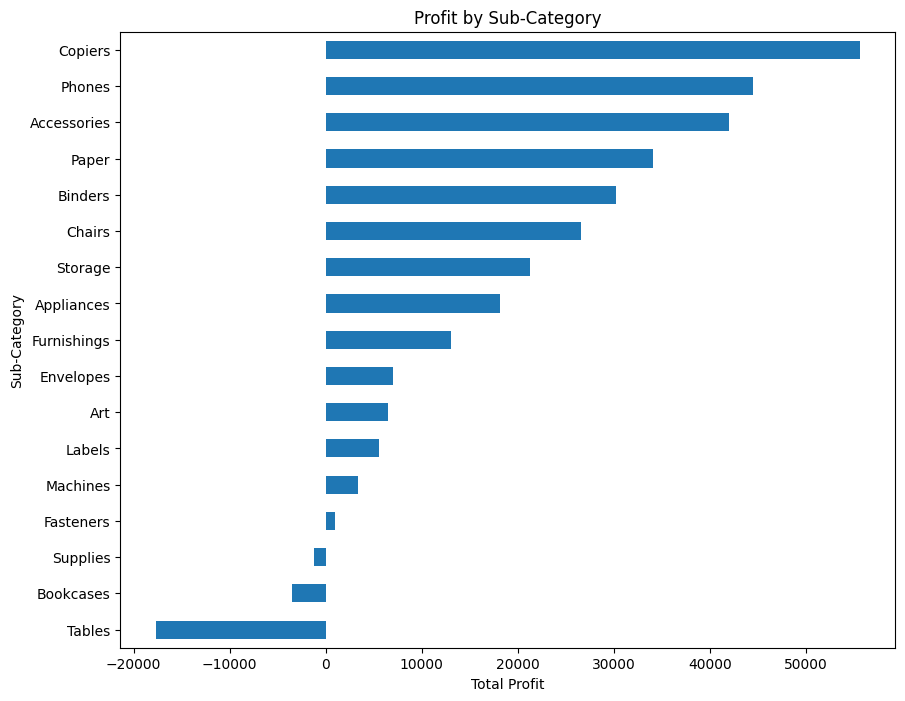

In [38]:
df.groupby("Sub-Category")["Profit"].sum().sort_values().plot(kind="barh", figsize=(10,8), title="Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.savefig("Profit by Sub-Category.png", dpi=300, bbox_inches='tight')
plt.show()

## Correlation Between Discount and Profit

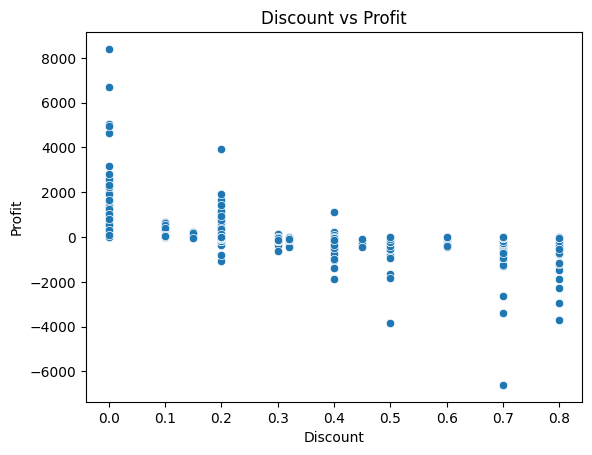

In [39]:
sns.scatterplot(data=df, x="Discount", y="Profit")
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.savefig("Discount vs Profit.png", dpi=300, bbox_inches='tight')
plt.show()


# Final: Recommendations & Insights

## Insights & Recommendations

- 📍 Top states: California, New York, and Texas generate the most revenue.
- ⚠️ Losses are high in Tables and Bookcases sub-categories.
- 🕒 Standard Class shipping shows slightly longer delays, but contributes most to sales.
- 🎯 Discounts above 30% sharply reduce profit — consider optimizing discount strategies.


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Delay
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


# Let’s clean and preprocess the Superstore dataset

####  Drop Irrelevant Columns

In [ ]:
# We drop IDs and names that don’t help analysis
df.drop(columns=[
    "Row ID", "Order ID", "Customer ID", "Customer Name", "Product ID", "Product Name"
], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      9994 non-null   datetime64[ns]
 1   Ship Date       9994 non-null   datetime64[ns]
 2   Ship Mode       9994 non-null   object        
 3   Segment         9994 non-null   object        
 4   Country         9994 non-null   object        
 5   City            9994 non-null   object        
 6   State           9994 non-null   object        
 7   Postal Code     9994 non-null   int64         
 8   Region          9994 non-null   object        
 9   Category        9994 non-null   object        
 10  Sub-Category    9994 non-null   object        
 11  Sales           9994 non-null   float64       
 12  Quantity        9994 non-null   int64         
 13  Discount        9994 non-null   float64       
 14  Profit          9994 non-null   float64       
 15  Ship

In [ ]:
df.to_csv("cleaned_data.csv", index=False)


| Column                            | Description                               |
| --------------------------------- | ----------------------------------------- |
| Order Date                        | Date of customer order                    |
| Ship Date                         | Actual shipping date                      |
| Ship Mode                         | Shipping type                             |
| Segment                           | Customer segment (Consumer, Corporate...) |
| Country, City, State              | Location info                             |
| Postal Code                       | Optional                                  |
| Region                            | Regional cluster                          |
| Category / Sub-Category           | Product classification                    |
| Sales, Quantity, Discount, Profit | Transaction details                       |
| **Shipping Delay**                | Derived feature: delivery delay in days   |
